In [ ]:
import sys
sys.path.append('..')
from analysis.mvpa.loaders import ExperimentDataLoader, LocalizerLoader, BetaLoader
from analysis.mvpa.decoders import Experiment1Decoder, Experiment2Decoder, InfoCouplingDecoder
from analysis.mvpa.utils import remove_nan_voxels
from scipy.io import loadmat
import re
import numpy as np
import pingouin as pg
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
loader = ExperimentDataLoader(data_dir='/project/3018040.05/dyncontext_bids/')

In [3]:
localizer = LocalizerLoader(data_dir='/project/3018040.05/dyncontext_bids/',
                            task='funcloc', model_name='exp1_objscr_baseline',
                            contrast_name='objscr-vs-baseline')

In [ ]:
train_dataset, test_dataset = loader.load_experiment_1_data(subject_id='sub-001',
                                                            roi='ba-17-18_R',
                                                            localizer=localizer,
                                                            n_voxels=500,
                                                            fir=True)

In [ ]:
train_dataset.data.shape

(60, 500)

In [34]:
wholebrain_dataset = loader.load_experiment_1_testonly(subject_id='sub-001',
                                                   roi='wholebrain',
                                                   fir=True)

: 

In [33]:
wholebrain_dataset.data.shape

(1120, 396859)

In [7]:
delay_ds = test_dataset.filter_by_delay(8)

In [9]:
delay_ds.delays

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])

In [10]:
train_clean, test_clean = remove_nan_voxels(train_dataset, test_dataset)

In [11]:
train_clean.data.shape

(60, 498)

In [12]:
test_clean.data.shape

(1120, 498)

In [21]:
decoder = InfoCouplingDecoder(data_dir='/project/3018040.05/dyncontext_bids/',
                             roi='ba-17-18', voxel_counts=[500])

In [27]:
timeresolved = decoder.run_complete_analysis(subject_id='sub-001')

In [24]:
timeresolved.groupby(['congruency', 'delay'])['classifier_info'].mean()

congruency   delay
congruent    1       -0.010044
             2        0.034045
             3        0.381353
             4        0.049426
             5        0.024739
             6        0.001821
             7        0.116162
             8        0.025085
             9       -0.040147
             10       0.009766
incongruent  1        0.081884
             2        0.349550
             3        0.448505
             4        0.329476
             5        0.068740
             6       -0.037657
             7        0.082622
             8        0.159706
             9        0.459729
             10       0.175564
Name: classifier_info, dtype: float64

<Axes: xlabel='delay', ylabel='classifier_info'>

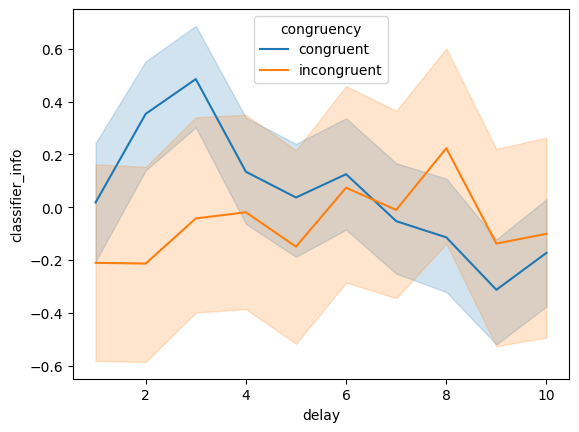

In [28]:
sns.lineplot(data=timeresolved, x='delay', y='classifier_info', hue='congruency')

## Experiment 1 main MVPA

In [10]:
decoder = Experiment1Decoder(data_dir='/project/3018040.05/dyncontext_bids/',
                             roi='ba-17-18', voxel_counts=[100, 200, 300, 400])

In [11]:
decoder.voxel_counts

[100, 200, 300, 400]

In [12]:
results_df = decoder.run_complete_analysis(subject_id='sub-002')

In [13]:
results_df['direction'].unique()

array(['forward', 'backward'], dtype=object)

In [14]:
results_df.groupby(['congruency', 'n_voxels', 'split'], dropna=False)['classifier_info'].mean()

congruency   n_voxels  split
congruent    100       1.0      0.254698
                       2.0      0.305429
                       3.0      0.206144
             200       1.0      0.315797
                       2.0      0.367264
                       3.0      0.303582
             300       1.0      0.378563
                       2.0      0.389273
                       3.0      0.344448
             400       1.0      0.411493
                       2.0      0.389742
                       3.0      0.376765
incongruent  100       NaN      0.055930
             200       NaN      0.206230
             300       NaN      0.253986
             400       NaN      0.302519
Name: classifier_info, dtype: float64

In [15]:
results_df.groupby(['direction', 'congruency'])['classifier_info'].mean()

direction  congruency 
backward   congruent      0.353329
           incongruent    0.199571
forward    congruent      0.301799
           incongruent    0.215584
Name: classifier_info, dtype: float64

In [16]:
results_df.direction.value_counts()

direction
backward    1920
forward      896
Name: count, dtype: int64

In [17]:
results_df.classifier_info.mean()

np.float64(0.30386642389144947)

In [18]:
results_df.split.unique()

array([1, 2, 3, None], dtype=object)

## Experiment 2

In [19]:
decoder = Experiment2Decoder(data_dir='/project/3018040.05/dyncontext_bids/',
                             roi='ba-17-18', voxel_counts=[100, 200, 300, 400])

In [20]:
decoder.voxel_counts

[100, 200, 300, 400]

In [21]:
results_df = decoder.run_complete_analysis(subject_id='sub-009')

In [24]:
results_df.classifier_info.mean()

np.float64(0.2557230611598205)

In [25]:
results_df

,sample_idx,true_label,predicted_label,correct,classifier_info,direction,hemisphere,n_voxels,roi,subject_id
0,0,0,0,True,0.994124,forward,L,100,ba-17-18,sub-009
1,1,0,0,True,0.826154,forward,L,100,ba-17-18,sub-009
2,2,0,0,True,0.154000,forward,L,100,ba-17-18,sub-009
3,3,0,0,True,0.756763,forward,L,100,ba-17-18,sub-009
4,4,0,0,True,0.332794,forward,L,100,ba-17-18,sub-009
...,...,...,...,...,...,...,...,...,...,...
587,55,1,1,True,0.861270,backward,R,400,ba-17-18,sub-009
588,56,1,1,True,1.619791,backward,R,400,ba-17-18,sub-009
589,57,1,0,False,-0.522715,backward,R,400,ba-17-18,sub-009
590,58,1,0,False,-0.213228,backward,R,400,ba-17-18,sub-009


In [27]:
results_df.groupby(['direction', 'n_voxels'])['classifier_info'].mean()

direction  n_voxels
backward   100         0.277068
           200         0.273454
           300         0.255634
           400         0.281205
forward    100         0.132884
           200         0.220530
           300         0.179667
           400         0.213517
Name: classifier_info, dtype: float64

In [28]:
results_df.groupby(['direction', 'n_voxels'])['correct'].mean()

direction  n_voxels
backward   100         0.575000
           200         0.591667
           300         0.600000
           400         0.600000
forward    100         0.535714
           200         0.571429
           300         0.500000
           400         0.535714
Name: correct, dtype: float64

In [29]:
results_df['classifier_info'].corr(results_df['correct'])

np.float64(0.7612476385894674)